<a href="https://colab.research.google.com/github/mrigankaghosh9/mrigankaghosh9/blob/main/TRAFFIC_SIGN_CLASSIFIACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will use Convolutional Neural Network to build train and test a traffic sign classification model. We will build this model using tensorflow and keras. It is a multiclass classification problem. This model can be used to make smarter cars.

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"m2023g19","key":"781fe229c8d2eae8dbb283ed17e258e1"}'}

Installing kaggle api using pip

In [3]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Setting up Kaggle using Kaggle API.

In [5]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


To store the data we will create a new directory and make it as current working directory.

In [6]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          90762       1010  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11907        265  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            190         26  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

Searching Kaggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [7]:
#Downloading datset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 609M/612M [00:19<00:00, 40.4MB/s]
100% 612M/612M [00:19<00:00, 33.0MB/s]
/content


In [8]:
# Unzipping downloaded file and removing unuable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00024.png  
  inflating: traffic_sign

Unzip the data which is downloaded and remove the irrelevant files

In [9]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Importing required libraries


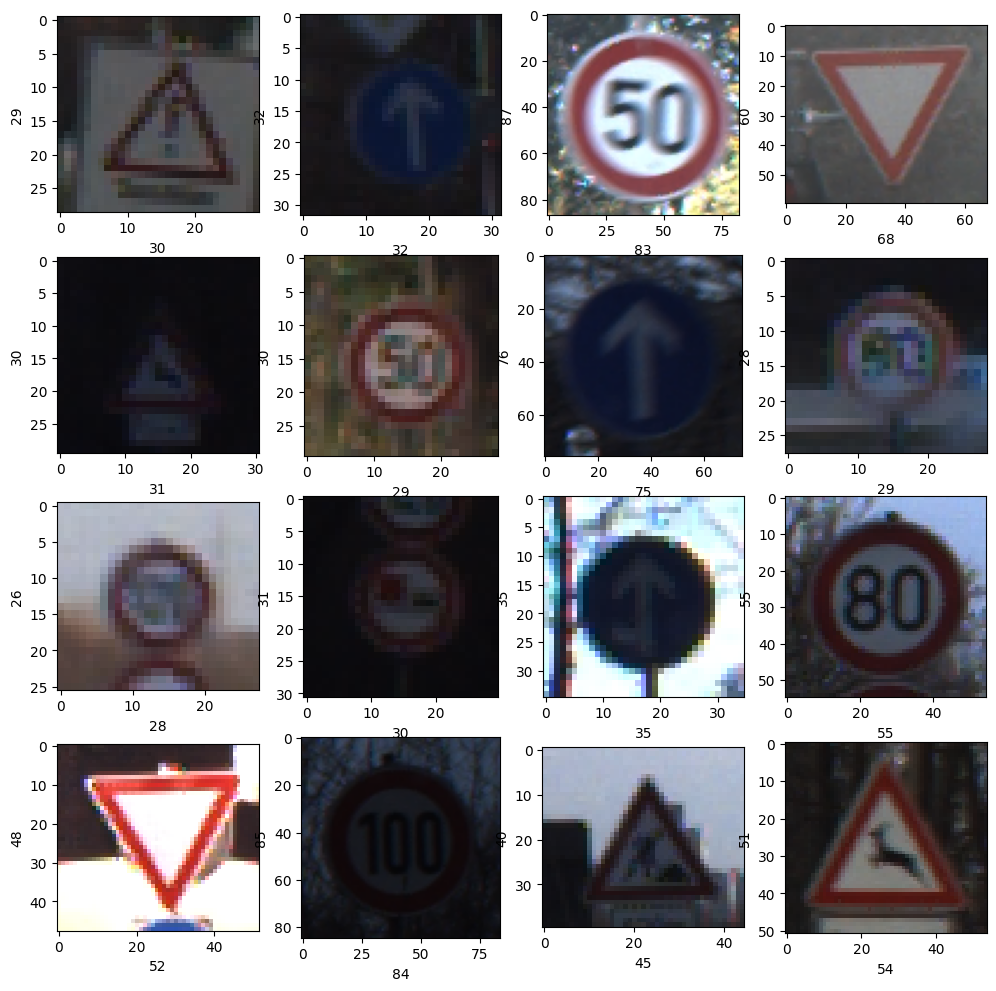

In [10]:
# Plotting 12 images to check datset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  rand_img = imread(path+'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize= 10) #width of image
  plt.ylabel(rand_img.shape[0], fontsize= 10) #height of image

Visualizing some images of traffic sign from the test dataset. we can see here the dimension of images are uneven

In [11]:
# As size of images are different we have them equal so we will take mean of dimensions

dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.  

In [12]:
#Printing mean dimension of images
print('Dimension 1 mean :', np.mean(dim1), 'Dimension 2 mean :',np.mean(dim2))

Dimension 1 mean : 50.328929582493814 Dimension 2 mean : 50.83587951745773


Now we will find out the mean value of both the dimension and analyse them.
Here, we can see that (50,50) is the average shape for all images

In [13]:
# Reshape the images to (50,50)

images = []
label_id = []

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

Reshape images into(50,50) and also store their label ids.

In [14]:
#Converting images into numpy array
images = np.array(images)

# The pixel value of each ranges between 0 and 255
# Dividing  each image by 255 will scale the values between o and 1. This is also known normalization
images = images/255

In [15]:
images

array([[[[0.21960784, 0.29411765, 0.20784314],
         [0.23921569, 0.24705882, 0.14509804],
         [0.36470588, 0.2745098 , 0.18431373],
         ...,
         [0.50196078, 0.48627451, 0.50980392],
         [0.3372549 , 0.38431373, 0.41568627],
         [0.28627451, 0.32941176, 0.36470588]],

        [[0.25490196, 0.29019608, 0.21176471],
         [0.29803922, 0.27058824, 0.17254902],
         [0.43529412, 0.31372549, 0.23529412],
         ...,
         [0.5372549 , 0.5254902 , 0.50196078],
         [0.40784314, 0.45098039, 0.49019608],
         [0.30980392, 0.34117647, 0.42745098]],

        [[0.30196078, 0.28235294, 0.20392157],
         [0.38823529, 0.30588235, 0.20392157],
         [0.53333333, 0.36862745, 0.29019608],
         ...,
         [0.5372549 , 0.53333333, 0.4745098 ],
         [0.45490196, 0.49019608, 0.52941176],
         [0.34901961, 0.36470588, 0.4745098 ]],

        ...,

        [[0.95686275, 0.83529412, 0.78039216],
         [0.96470588, 0.89411765, 0.85490196]

Convertion of all images into numpy and normalize them

In [16]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Storing label ids into numpy array and printing the shape. obseravtion of 39209 ids

In [17]:
images.shape

(39209, 50, 50, 3)

Checking the shape of images

In [18]:
# Visualise the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

Observe images per class for checking whether the data balanced or not.

In [19]:
#Splitting the data

X_train, X_val, y_train, y_val =  train_test_split(images, label_id, test_size= 0.2, random_state= 42)

In [20]:
# Keras has built in function for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Converting the class column into categorical using to_categorical() function

In [21]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = X_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

Defining model architecture

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [23]:
val_data = (X_val, y_val)

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size= 128, validation_data= val_data, verbose=2)

Epoch 1/10
246/246 - 5s - loss: 0.2281 - accuracy: 0.9248 - val_loss: 0.0499 - val_accuracy: 0.9906 - 5s/epoch - 22ms/step
Epoch 2/10
246/246 - 4s - loss: 0.2161 - accuracy: 0.9286 - val_loss: 0.0508 - val_accuracy: 0.9915 - 4s/epoch - 18ms/step
Epoch 3/10
246/246 - 4s - loss: 0.2073 - accuracy: 0.9336 - val_loss: 0.0444 - val_accuracy: 0.9922 - 4s/epoch - 18ms/step
Epoch 4/10
246/246 - 4s - loss: 0.1919 - accuracy: 0.9367 - val_loss: 0.0449 - val_accuracy: 0.9913 - 4s/epoch - 18ms/step
Epoch 5/10
246/246 - 4s - loss: 0.1864 - accuracy: 0.9396 - val_loss: 0.0376 - val_accuracy: 0.9918 - 4s/epoch - 17ms/step
Epoch 6/10
246/246 - 5s - loss: 0.1820 - accuracy: 0.9409 - val_loss: 0.0378 - val_accuracy: 0.9930 - 5s/epoch - 19ms/step
Epoch 7/10
246/246 - 4s - loss: 0.1692 - accuracy: 0.9456 - val_loss: 0.0369 - val_accuracy: 0.9923 - 4s/epoch - 18ms/step
Epoch 8/10
246/246 - 4s - loss: 0.1680 - accuracy: 0.9454 - val_loss: 0.0370 - val_accuracy: 0.9922 - 4s/epoch - 18ms/step
Epoch 9/10
246/2

Fitting the model and observing epoch to be trained

<Axes: >

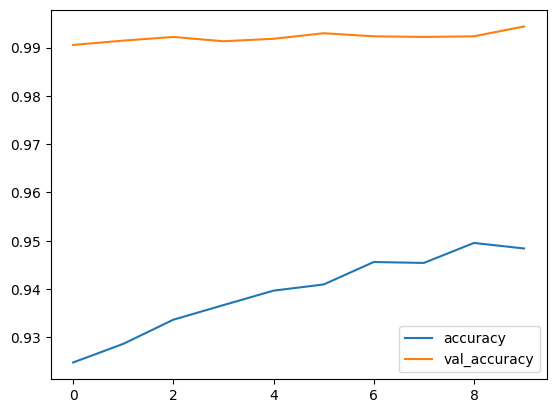

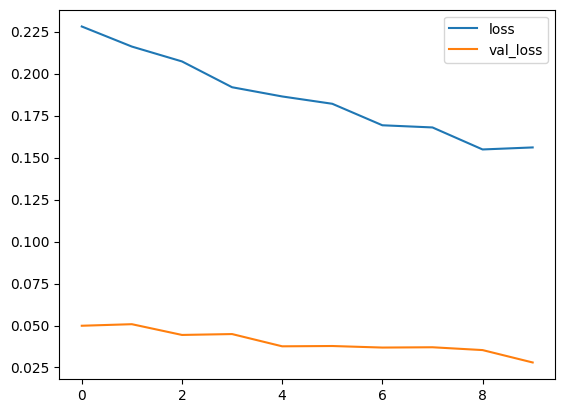

In [29]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

In [30]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Creating the variable which has path of test dataset. As we downloded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed. So, we will remove that file.

In [36]:
# defining a function that will scale images

from PIL import Image

def scalling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

    #Converting images into numpy array
    images = np.array(images)

    #pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1.
    images = images/255

    return images

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [37]:
test_images = scalling(sorted(os.listdir(test_path)), test_path)

calling the above created function on test images

In [38]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Now we will use the model to make predictions on our test images and save them in y_pred

In [39]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Storing the labels according to the image classes

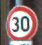

In [45]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

Let's visualize the test image

In [47]:
#Original Label
print('Original Label : ',all_lables[y_test[1]])

Original Label :  Speed limit (30km/h)


## Conclusion

We started with downloading the dataset, preprocessing it, created the model and found out the predictions using the model. During preprocessing we found that this dataset has 43 classes. Model reached an accuracy of 95%+ in just 50 epochs, we can further optimize the model using hyper parameter tuning and reach a higher accuracy.